<a href="https://colab.research.google.com/github/HaseebUlHassan437/recurrent-neural-networks-RNN/blob/main/Copy_of_sentiment_analysis_simplernn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
docs = ['go pakistan',
		'pakistan pakistan',
		'hip hip hurray',
		'jeetega bhai jeetega pakistan jeetega',
		'dil dil pakistan',
		'Imran khan zindabad',
		'Haseeb Ul hassan',
		'ALi hussain',
		'ye watan hamara hai',
		'i love to play snooker']

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [20]:
tokenizer.fit_on_texts(docs)

In [21]:
len(tokenizer.word_index)

24

In [22]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[5, 1],
 [1, 1],
 [3, 3, 6],
 [2, 7, 2, 1, 2],
 [4, 4, 1],
 [8, 9, 10],
 [11, 12, 13],
 [14, 15],
 [16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [23]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 5,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3,  6,  0,  0],
       [ 2,  7,  2,  1,  2],
       [ 4,  4,  1,  0,  0],
       [ 8,  9, 10,  0,  0],
       [11, 12, 13,  0,  0],
       [14, 15,  0,  0,  0],
       [16, 17, 18, 19,  0],
       [20, 21, 22, 23, 24]], dtype=int32)

In [25]:
from keras import Sequential
from keras.layers import Dense,Flatten,Embedding

In [28]:
model = Sequential()
model.add(Embedding(24,output_dim=2,input_length=5))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile('adam','accuracy')

In [31]:
pred = model.predict(sequences)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[[ 0.03215056  0.02692949]
  [ 0.00542765 -0.0141238 ]
  [-0.007693    0.01141157]
  [-0.007693    0.01141157]
  [-0.007693    0.01141157]]

 [[ 0.00542765 -0.0141238 ]
  [ 0.00542765 -0.0141238 ]
  [-0.007693    0.01141157]
  [-0.007693    0.01141157]
  [-0.007693    0.01141157]]

 [[-0.00723761 -0.03578106]
  [-0.00723761 -0.03578106]
  [ 0.03433133 -0.00704699]
  [-0.007693    0.01141157]
  [-0.007693    0.01141157]]

 [[ 0.02430284  0.00930981]
  [ 0.03187844  0.01179917]
  [ 0.02430284  0.00930981]
  [ 0.00542765 -0.0141238 ]
  [ 0.02430284  0.00930981]]

 [[-0.02222796  0.00466526]
  [-0.02222796  0.00466526]
  [ 0.00542765 -0.0141238 ]
  [-0.007693    0.01141157]
  [-0.007693    0.01141157]]

 [[-0.04873873 -0.01159468]
  [ 0.01410357  0.01802431]
  [ 0.0352221   0.04167379]
  [-0.007693    0.01141157]
  [-0.007693    0.01141157]]

 [[ 0.00768401 -0.02048075]
  [-0.0195305   0.03804828]
  [ 0.01663797  0.03784165]
  [-0.007693    0.01141157

In [33]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [34]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [43]:
from tensorflow.keras.datasets import imdb
word_index = imdb.get_word_index()
print("Vocabulary size:", len(word_index))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Vocabulary size: 88584


In [46]:
X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding='post')

In [47]:
X_train.shape

(25000, 50)

In [48]:
from tensorflow.keras.layers import SimpleRNN , Embedding, Dense
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential()
model.add(Embedding(input_dim=88584, output_dim=2, input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - acc: 0.5321 - loss: 0.6869 - val_acc: 0.7547 - val_loss: 0.5174
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.8139 - loss: 0.4206 - val_acc: 0.8116 - val_loss: 0.4223
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.8995 - loss: 0.2610 - val_acc: 0.8048 - val_loss: 0.4424
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.9297 - loss: 0.1927 - val_acc: 0.8016 - val_loss: 0.4832
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.9543 - loss: 0.1350 - val_acc: 0.7842 - val_loss: 0.6208


In [51]:
print("\nTraining logs:")
for key in history.history:
    print(f"{key}: {history.history[key]}")



Training logs:
acc: [0.58160001039505, 0.8201599717140198, 0.893559992313385, 0.9267600178718567, 0.9487199783325195]
loss: [0.6528104543685913, 0.4036753177642822, 0.2721167504787445, 0.1998320072889328, 0.14821965992450714]
val_acc: [0.7546799778938293, 0.8115599751472473, 0.8048400282859802, 0.8015999794006348, 0.7842400074005127]
val_loss: [0.5174174308776855, 0.4222722351551056, 0.44241273403167725, 0.4831521213054657, 0.6208106279373169]


In [55]:
import matplotlib.pyplot as plt

# 7. Plot accuracy and loss
plt.figure(figsize=(12, 5))



<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

### **clear difference between the training and val accuracy...**

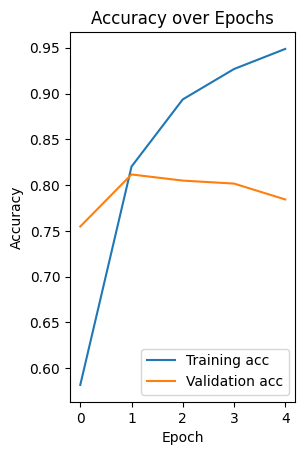

In [56]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training acc')
plt.plot(history.history['val_acc'], label='Validation acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



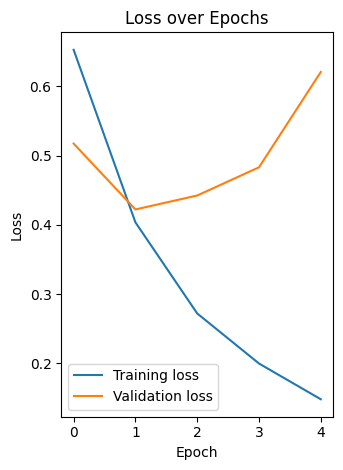

In [57]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()